# Logscale and nonlinear regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Solar panels
- Read in the file solarpanels.csv
- Plot the year since 1982 versus the solar panel capacity made
- Is a linear trend good here? why or why not?


3.063777089783338


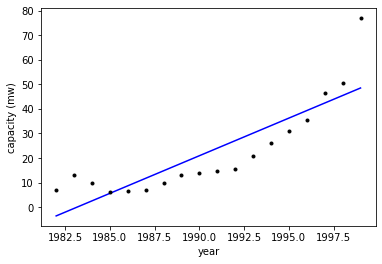

In [7]:
data = np.loadtxt('./solarpanels.csv',delimiter=",",skiprows=4)
yeardata = data[:,0]
capdata = data[:,1]

m,b = np.polyfit(yeardata,capdata,deg=1)

ys = np.linspace(min(yeardata),max(yeardata),101)
cs = m*ys+b

plt.plot(ys,cs,'b',yeardata,capdata,'k.');
plt.xlabel('year');
plt.ylabel('capacity (mw)');

#print(np.corrcoef(yeardata,capdata))

print(m)

- Plot the year since 1982 versus the log of the solar panel capacity
- What do you notice?
- Fit a line of best fit to this data.
- Put the equation for the line on the plot figure itself.

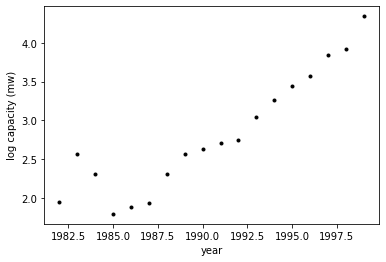

In [8]:
logcapdata =np.log(capdata)

plt.plot(yeardata,logcapdata,'k.');
plt.xlabel('year');
plt.ylabel('log capacity (mw)');

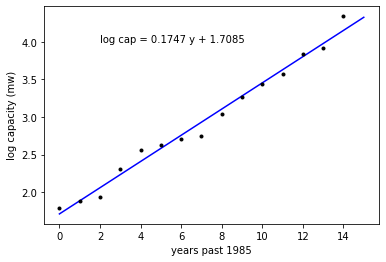

In [41]:
nlogcap = logcapdata[3:]  #log of capdata skipping first three points
nyear = yeardata[3:] - 1985   #years past 1985

m, b = np.polyfit(nyear,nlogcap, deg=1)

nys = np.linspace(0,15,101)
nlcs = m*nys + b

plt.plot(nys, nlcs, 'b', nyear,nlogcap,'k.');
plt.xlabel('years past 1985');
plt.ylabel('log capacity (mw)');
plt.text(2,4,f"log cap = {m:2.4f} y + {b:2.4f}");

- Repeat the task above but use the semilogy plot command.

 log10cap = 0.06 y + -113.17


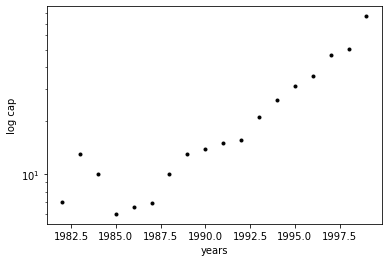

In [14]:
plt.semilogy(yeardata,capdata,'k.');
plt.xlabel('years');
plt.ylabel('log cap');

log10cap = np.log10(capdata)

m, b = np.polyfit(yeardata,log10cap,deg=1)

print(f' log10cap = {m:4.2f} y + {b:4.2f}')

### River entrainment speeds
Rivers and streams carry small solid particles of rock and mineral downhill, either suspended in the water column ("suspended load") or bounced, rolled or slid along the river bed ("bed load"). Solid particles are classified according to their mean diameter from smallest to largest as clay, silt, sand, pebble, cobble and boulder.

During low velocity flow, only very small particles (clay and silt) can be transported by the river, whereas during high velocity flow, much larger particles may be transported. There are two steps in transporting a sediment particle in suspension. First, the velocity must be high enough to entrain or lift the particle from the river bed. Entrainment velocities are usually very high for both clay sized particles (which are "sticky") and large particles (which are heavy). Second, the velocity must be high enough to keep the particle in suspension. For very small particles, the speed necessary for a particle to remain in suspension is often lower than the entrainment velocity.

The data in riverspeeds.csv show the speed necessary to carry particles in suspension, once they have been entrained. 

- Plot the size of the entrained particle size in suspension against the river speed.
- Is a linear regression good here?
- Is an exponential fit appropriate?
- Plot the data on a log log scale.
- Fit a line to this data.
- What is the relationship between the variables?

[[1.         0.99831784]
 [0.99831784 1.        ]]


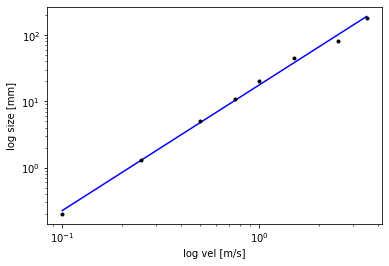

In [22]:
data = np.loadtxt('./riverspeeds.csv',delimiter=',',skiprows=5,usecols=(0,1))

sizedata = data[:,0]
veldata = data[:,1]

m,b = np.polyfit(np.log10(veldata),np.log10(sizedata),deg=1)

vs = np.linspace(min(veldata),max(veldata),101)
ss = 10.**b * vs**m

plt.loglog(vs,ss,'b',veldata,sizedata,'k.');
plt.xlabel('log vel [m/s]');
plt.ylabel('log size [mm]');

print(np.corrcoef(np.log10(veldata),np.log10(sizedata)))

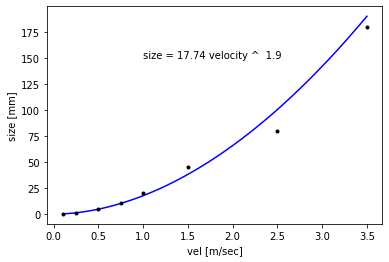

In [27]:
plt.plot(vs,ss,'b',veldata,sizedata,'k.');
plt.xlabel('vel [m/sec]');
plt.ylabel('size [mm]');
plt.text(1,150,f'size = {10**b:4.2f} velocity ^ {m:4.2}');

### velocity versus discharge at Soos Creek

The size of a stream or river at any given point along the stream can be quantified by measuring the width of the "wetted perimeter" of the channel, the mean depth of the water in the channel, and the mean speed or velocity of the stream. These three measurements can be multiplied together to calculate the stream's discharge at a station, which is the volume of water passing by in a given amount of time. Discharge is typically measured in cubic meters or cubic feet per second, though in very low flows, gallons per minute might be used.

At a remote stream gauging station, the height of the water (gage height) is measured and transmitted via satellite to a central recording facility. Empirical relationships (based on many measurements) between gage height, velocity, mean depth and mean width are used to calculate discharge. Therefore, one key task in this process is to actually measure mean velocity at various gage heights.

The velocity at any point in a river is controlled by a number of factors, including the river's slope or gradient, roughness of the channel bed, turbulence of the flow, depth of the river, etc. Typically, water moves faster away from the bed of the river, where obstacles create drag and turbulence. The highest velocity overall is usually in the deepest part of the channel, just below the surface. And therefore the deeper the water, the higher the velocity (for confined channel flow).

A river accommodates increasing discharge by widening, deepening and speeding up. Naturally we would expect some sort of positive correlation between observed discharge and observed velocity. The data in the table, collected by the United States Geological Survey for Soos Creek in Washington State, shows the expected positive relationship. However, the relationship is highly non-linear. Velocity increases rapidly with increasing discharge, but then flattens out, perhaps approaching some limit.

- Read in the data from soos_discharge.csv.
- Plot the data.
- Use the ideas above to see if you can come up with a model that explains the relationship between the variables.

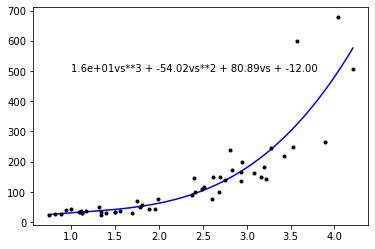

In [33]:
data = np.loadtxt('./soos_discharge.csv',delimiter=',',skiprows=3,usecols=(2,3))

veldata = data[:,1]
dischargedata = data[:,0]

coeff = np.polyfit(veldata,dischargedata,deg=3)  #note this plots/regresses in opposite order of problem

vs = np.linspace(min(veldata),max(veldata),101)
ds = coeff[0]*vs**3 + coeff[1]*vs**2 + coeff[2]*vs + coeff[3]  

plt.plot(vs,ds,'b',veldata,dischargedata,'k.');
plt.text(1.,500,f"{coeff[0]:4.2}vs**3 + {coeff[1]:4.2f}vs**2 + {coeff[2]:4.2f}vs + {coeff[3]:4.2f}" );

#note this predicts negative discharge when vel is zero

0.3953119769047801 1.044245464367155


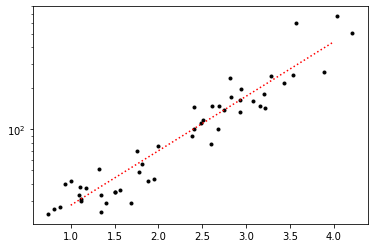

In [36]:
data = np.loadtxt('./soos_discharge.csv',delimiter=',',skiprows=3,usecols=(2,3))

veldata = data[:,1]
dischargedata = data[:,0]

plt.semilogy(veldata,dischargedata,'k.');

m, b = np.polyfit(veldata,np.log10(dischargedata),deg=1)
print(m, b)

vs = np.linspace(1,4,101)
ds = 10**1.044*10**(0.4*vs)

plt.semilogy(vs,ds,'r:');

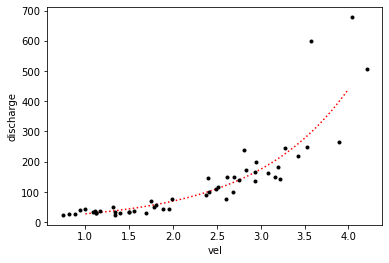

In [38]:
plt.plot(vs,ds,'r:',veldata,dischargedata,'k.');
plt.xlabel('vel');
plt.ylabel('discharge');

### Polymer relaxation
Materials scientists are interested in how cylindrical polymer samples that have been twisted by a fixed amount relax over time. They are also interested in finding out how temperature may affect this process. As a result, both time and temperature are thought to be important factors for describing the systematic variation in this polymer relaxation data.

- Read in the data from polymer_relaxation.txt.
- Plot the data Torque vs time data for just when the temperature is 55 degrees.
- Can you come up with a relationship for torque and time for this temp?